In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from fiber_properties import FiberImage
from matplotlib import rc, cycler
cmap = mpl.cm.get_cmap('inferno')
import os
import numpy as np

colors = ['black', 'red', 'orange', 'yellow', 'gray', 'pink']

rc('figure', figsize=[3.39, 3.0])
rc('text', usetex=True)
rc('text.latex', preamble= [r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
                            r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#                             r'\usepackage{helvet}',    # set the normal font here
#                             r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#                             r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
                            ])

rc('font', size=10, family='serif', serif=['Computer Modern Roman'])
rc('axes', labelsize=10, linewidth=1, unicode_minus=True,
   prop_cycle=cycler('color', colors))
rc('legend', frameon=False, fontsize=10, labelspacing=0.5, numpoints=1)
rc('lines', linewidth=1)

rc('xtick', labelsize=10, direction='in', top=True)
rc('xtick.major', size=4, width=1)
rc('xtick.minor', visible=True, size=2, width=1)

rc('ytick', labelsize=10, direction='in', right=True)
rc('ytick.major', size=4, width=1)
rc('ytick.minor', visible=True, size=2, width=1)

print('Complete')


Complete


In [2]:
# Helpful functions for getting saved data

def image_base(folder, cam, im):
    if folder and not folder.endswith('/'):
        folder += '/'
    return folder + cam + '_' + str(im).zfill(3)

def object_file(folder, cam, num=10, start=0):
    if folder and not folder.endswith('/'):
        folder += '/'
    front = image_base(folder, cam, start)
    back = '_obj.pkl'
    if start == 0 and not os.path.exists(image_base(folder, cam, num) + '.fit'):
        return folder + cam + back
    elif num == 1:
        return front + back
    else:
        return front + '-' + str(start+num-1).zfill(3) + back

def populate_data(*args):
    for data in args:
        data['mn_x10'] = []
        data['mn_x1'] = []
        data['mn_time'] = []
        for test in data['tests']:
            folder = data['folder'] + test
            data['mn_x10'].append(FiberImage(object_file(folder, 'nf', 10, 0)).get_modal_noise(method='filter', kernel_size=51))
            data['mn_x1'].append(0.0)
            for i in range(10):
                data['mn_x1'][-1] += FiberImage(object_file(folder, 'nf', 1, i)).get_modal_noise(method='filter', kernel_size=51) / 10.0
            
            mn_time = [data['mn_x1'][-1]]
            for i in range(1,10):
                mn_time.append(FiberImage(object_file(folder, 'nf', i+1, 0)).get_modal_noise(method='filter', kernel_size=51))
            data['mn_time'].append(mn_time)
            
def populate_data_1x(*args):
    for data in args:
        data['mn_x10'] = []
        data['mn_x1'] = []
        for test in data['tests']:
            folder = data['folder'] + test
            data['mn_x10'].append(FiberImage(object_file(folder, 'nf', 10, 0)).get_modal_noise(method='filter', kernel_size=51))
            data['mn_x1'].append(0.0)
            for i in range(10):
                data['mn_x1'][-1] += FiberImage(object_file(folder, 'nf', 1, i)).get_modal_noise(method='filter', kernel_size=51) / 10.0
                

print('Complete')


Complete


In [3]:
# Populate the data

folder = 'C:/Libraries/Box Sync/ExoLab/Fiber_Characterization/Image Analysis/data/modal_noise/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/'

# Amplitude and frequency data

amp_data = {'name': 'amplitude',
            'folder': folder + 'rec_fiber_amp_tests/',
            'tests': ['agitated_15volts_40mm_2s',
                      'agitated_15volts_80mm_2s',
                      'agitated_15volts_120mm_2s',
                      'agitated_15volts_160mm_2s'],
            'labels': ['15volts 40mm 2s',
                      '15volts 80mm 2s',
                      '15volts 120mm 2s',
                      '15volts 160mm 2s'],
            'x_val': [80, 160, 240, 320]}
lin_freq_data = {'name': 'linear frequency',
                 'folder': folder + 'rec_fiber_freq_tests/',
                 'tests': ['agitated_5volts_120mm_7.5s',
                           'agitated_10volts_120mm_3.2s',
                           'agitated_15volts_120mm_2s',
                           'agitated_20volts_120mm_1.5s',
                           'agitated_25volts_120mm_1.2s',
                           'agitated_30volts_120mm_1s'],
                 'labels': ['5volts 120mm 7.5s',
                           '10volts 120mm 3.2s',
                           '15volts 120mm 2s',
                           '20volts 120mm 1.5s',
                           '25volts 120mm 1.2s',
                           '30volts 120mm 1s'],
                 'x_val': [0.13, 0.31, 0.50, 0.67, 0.83, 1.00]}
circ_freq_data = {'name': 'circular frequency',
                  'folder': folder + 'rec_fiber_freq_tests/circular_ag/',
                  'tests': ['agitated_5volts_6.3s',
                            'agitated_10volts_2.6s',
                            'agitated_15volts_1.7s',
                            'agitated_20volts_1.2s'],
                  'labels': ['5volts 6.3s',
                            '10volt 2.6s',
                            '15volts 1.7s',
                            '20volts 1.2s'],
                  'x_val': [0.16, 0.38, 0.59, 0.83]}
unagitated_data = {'name': 'unagitated',
                   'folder': folder + 'rec_fiber_freq_tests/',
                   'tests': ['unagitated_1s/']}

amp_freq_data = [amp_data, lin_freq_data, circ_freq_data, unagitated_data]
populate_data(*amp_freq_data)


print('Complete')


object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\nf_obj.pkl
height 1200
units pixels
_y 576.229263694
_x 586.572119334
full (586.572119334, 576.229263694)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C6710>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf

rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C6048>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4E9C6240>
temp -5.4
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\nf_001_obj.pkl
height 1200
units pixels
_y 576.449484569
_x 586.590728306
full (586.590728306, 576.449484569)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4

_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA6DD30>
date_time 2017-07-19 19:49:56.200000
num_images 1
full 879.385478192
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA6DF60>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_i

circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA6D240>
date_time 2017-07-19 19:50:05.800000
num_images 1
full 880.745789091
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA6DF60>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA6D5C0>
subframe_x 624
full {b'dark_folder': None, b'ambient_folder': b'../ambient_2s/', b'show_image': F

new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_40mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA21630>
subframe_x 624
full {b'dark_folder': None, b'ambient_folder': b'../ambient_2s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4EA91CF8>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_p

ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_006.fit', 'C:\\Libraries\\Bo

_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C6EF0>
date_time 2017-07-19 19:52:27.700000
num_images 1
full 880.663256314
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C6588>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4E9C6E80>
subframe_x 624
full {b'dark_folder': None, b'ambient_folder': b'../ambient_2s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units

edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA26F98>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4E9F7BE0>
subframe_x 624
full {b'dark_folder': None, b'ambient_folder': b'../ambient_2s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4EA264A8>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, N

_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA2C1D0>
date_time 2017-07-19 19:53:01.400000
num_images 1
full 880.336123815
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA2C5C0>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA2C208>
subframe_x 624
full {b'dark_folder': None, b'ambient_folder': b'../ambient_2s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}


gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C25F8>
date_time 2017-07-19 19:52:18
num_images 1
full 880.141568799
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C2B70>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_prop

exp_time 2.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA02668>
date_time 2017-07-19 19:52:18
num_images 1
full 879.638223946
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA20DD8>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_80mm_2s\
gaussian_coeffs None
energy_loss [

flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA595F8>
date_time 2017-07-19 19:57:09.700000
num_images 1
full 880.069318083
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA59668>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_120mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_120mm_2s\
gaussian_coeffs None
energy_loss []
ou

units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA591D0>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_005.fit', 'C:\\Libraries\\Box Sync\\Ex

_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA50EB8>
temp -4.5
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_120mm_2s\nf_000-006_obj.pkl
height 1200
units pixels
_y 576.069876185
_x 586.559426105
full (586.559426105, 576.069876185)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EAA7A58>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\ambient_2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber

_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C64A8>
date_time 2017-07-19 20:02:41.700000
num_images 1
full 879.998727968
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C6550>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_160mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_160mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4E9C6668>
subframe_x 624
full {b'dark_folder': None, b'ambient_folder': b'../ambient_2s/'

_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C70B8>
date_time 2017-07-19 20:03:05.900000
num_images 1
full 880.470961952
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA6FEB8>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_160mm_2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_amp_tests\agitated_15volts_160mm_2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA50390>
subframe_x 624
full {b'dark_folder': None, b'ambient_folder': b'../ambient_2s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {

gaussian None
filter 29.6454097071
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A4EA7D940>
width 1200
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\agitated_15volts_160mm_2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\agitated_15volts_160mm_2s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\agitated_15volts_160mm_2s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\agitated_15volts_160mm_2s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_amp_tests\\agitated_15volts_160mm_2s\\nf_004.fit', 'C:\\Librar

image_file None
exp_time 7.5
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA56390>
date_time 2017-07-19 18:22:28.100000
num_images 1
full 880.931550469
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA565F8>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_5volts_120mm_7.5s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_5volts_120mm_7.5s\
gauss

_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA48B00>
date_time 2017-07-19 18:23:30.900000
num_images 1
full 880.193302664
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA48E48>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_5volts_120mm_7.5s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_5volts_120mm_7.5s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.

units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4AE23AC8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_7.5s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_7.5s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_7.5s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_7.5s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_7.5s\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_7.5s\\nf_005.fit', 'C:\\Libra

gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4E9EA048>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_5volts_120mm_7.5s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_5volts_120mm_7.5s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4E9EA710>
subframe_x 624
full {b'ambient_folder': b'../ambient_7.5s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4E9EA0B8>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, N

full (585.629124974, 576.346883622)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4AE23CF8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_3.2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_3.2s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_3.2s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_3.2s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Character

_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA87160>
date_time 2017-07-19 18:29:44.800000
num_images 1
full 880.263017981
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA87208>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_10volts_120mm_3.2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_10volts_120mm_3.2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA87CF8>
subframe_x 624
full {b'ambient_folder': b'../ambient_3.2s', b'show_image': False}

output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA916A0>
subframe_x 624
full {b'ambient_folder': b'../ambient_3.2s', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C2F60>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA91518>
temp -5.2
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_10volts_120mm_3.2s\nf_000-008_obj.pkl
height 1200
units pixels
_y 576.261104505
_x 585.633901198
full (585.633901198, 576.261104505)
units pixels
_y None
_x None
gaus

units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA95908>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_15volts_120mm_2s\nf_003_obj.pkl
height 1200
units pixels
_y 576.414138507
_x 585.69118887
full (585.69118887, 576.414138507)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4AE35240>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_

filter 19.6513309946
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A4EA85DA0>
width 1200
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\agitated_15volts_120mm_2s\\nf_009.fit']
test None
image_file None
exp_time 2.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA859E8>
date_time 2017-07-19 18:35:05
num_images 1
full 878.719893489
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x00000

units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA4B860>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_15volts_120mm_2s\nf_000-007_obj.pkl
height 1200
units pixels
_y 576.460308446
_x 585.613793271
full (585.613793271, 576.460308446)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4AE35160>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_2s\\nf_000.fit', 'C:\\Libraries\\

circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA85588>
date_time 2017-07-19 18:40:34.700000
num_images 1
full 881.297755479
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA852B0>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_20volts_120mm_1.5s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_20volts_120mm_1.5s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA85748>
subframe_x 624
full {b'ambient_folder': b'../ambient_1.5s/', b'show_image': False}
gaussi

_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA94160>
temp -4.4
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_20volts_120mm_1.5s\nf_008_obj.pkl
height 1200
units pixels
_y 576.788609883
_x 585.767979108
full (585.767979108, 576.788609883)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA94828>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1.5s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\Exo

_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4E6CD6A0>
temp -4.4
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_20volts_120mm_1.5s\nf_000-004_obj.pkl
height 1200
units pixels
_y 576.770181786
_x 585.784625663
full (585.784625663, 576.770181786)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EAAF550>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1.5s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\

_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA2CA90>
temp -4.4
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_25volts_120mm_1.2s\nf_obj.pkl
height 1200
units pixels
_y 576.718454205
_x 585.699022778
full (585.699022778, 576.718454205)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4E96CA58>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1.2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_C

units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA7B8D0>
date_time 2017-07-19 18:44:13.900000
num_images 1
full 880.628214379
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA7B278>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_25volts_120mm_1.2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_25volts_120mm_1.2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA7BEF0>
subframe_x 624
full {b'ambient_folder': b'../ambient_1.2s/',

units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA35978>
temp -4.6
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_25volts_120mm_1.2s\nf_000-002_obj.pkl
height 1200
units pixels
_y 576.580040044
_x 585.677676142
full (585.677676142, 576.580040044)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C2668>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1.2s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Im

encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA7B860>
subframe_x 624
full {b'ambient_folder': b'../ambient_1.2s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4EA7BAC8>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA7BE10>
temp -4.6
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_25volts_120mm_1.2s\nf_obj.pkl
height 1200
units pixels
_y 576.718454205
_x 585.699022778
full (585.699022778, 576.718454205)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None,

_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4E73F4A8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\F

_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA30860>
subframe_x 624
full {b'ambient_folder': b'../ambient_1s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4EA30D30>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA5EAC8>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_30volts_120mm_1s\nf_000-001_obj.pkl
height 1200
units pixels
_y 576.801006146
_x 585.750940493
full (585.750940493, 576.801006146)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_

_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4E6C34A8>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\agitated_30volts_120mm_1s\nf_000-007_obj.pkl
height 1200
units pixels
_y 576.765133748
_x 585.739415847
full (585.739415847, 576.765133748)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA59780>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal

contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A4EA95668>
width 1200
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\agitated_5volts_6.3s\\nf_003.fit']
test None
image_file None
exp_time 6.3
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA95C50>
date_time 2017-07-19 19:07:00
num_images 1
full 879.953151809
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA32278>
dark None
bit_depth 16
ne

gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4EA95940>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA956A0>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_5volts_6.3s\nf_009_obj.pkl
height 1200
units pixels
_y 576.956511366
_x 586.001581037
full (586.001581037, 576.956511366)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_cente

kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_5volts_6.3s\nf_000-006_obj.pkl
height 1200
units pixels
_y 576.877226
_x 585.966747612
full (585.966747612, 576.877226)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A49563A20>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_6.3s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_6.3s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysi

object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_10volts_2.6s\nf_001_obj.pkl
height 1200
units pixels
_y 576.943313515
_x 586.720540699
full (586.720540699, 576.943313515)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA50240>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\mo

circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA320B8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Ana

_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4E9C1278>
temp -4.3
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_10volts_2.6s\nf_000-006_obj.pkl
height 1200
units pixels
_y 576.893091939
_x 586.656784364
full (586.656784364, 576.893091939)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C1828>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_2.6s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Imag

_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EAAF470>
temp -3.6
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_15volts_1.7s\nf_000_obj.pkl
height 1200
units pixels
_y 576.730317407
_x 586.549143954
full (586.549143954, 576.730317407)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EAAFC88>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_1.7s\\nf_000.fit', 'C:\\Libra

filter 10.3031939565
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A4E9C18D0>
width 1200
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\agitated_15volts_1.7s\\nf_007.fit']
test None
image_file None
exp_time 1.7
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C1CC0>
date_time 2017-07-19 19:16:54.700000
num_images 1
full 880.390408849
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo o

_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA4BF60>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_1.7s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_1.7s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_1.7s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_1.7s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\circular_ag\\ambient_1.7s\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\I

radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4EA85E48>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA856D8>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_20volts_1.2s\nf_000_obj.pkl
height 1200
units pixels
_y 576.721931747
_x 586.629646488
full (586.629646488, 576.721931747)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties

_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4EA2C710>
date_time 2017-07-19 19:20:44.300000
num_images 1
full 879.806954424
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA2C278>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_20volts_1.2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_20volts_1.2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4EA2C8D0>
subframe_x 624
full {b'ambient_folder': b'../ambient_1.2s/', 

_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C1358>
date_time 2017-07-19 19:20:20.400000
num_images 1
full 879.409434274
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C1E10>
dark None
bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_20volts_1.2s\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\circular_ag\agitated_20volts_1.2s\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A4E9C1828>
subframe_x 624
full {b'ambient_folder': b'../ambient_1.2s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}


full {b'ambient_folder': b'../ambient_1s/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4EA91470>
data_file None
subframe_y 428
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA50F98>
temp -4.7
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\unagitated_1s\nf_001_obj.pkl
height 1200
units pixels
_y 575.088089925
_x 584.910272387
full (584.910272387, 575.088089925)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixel

right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EA3A5C0>
temp -4.7
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\rec_fiber_freq_tests\unagitated_1s\nf_008_obj.pkl
height 1200
units pixels
_y 574.922167031
_x 584.948396195
full (584.948396195, 574.922167031)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA3A828>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\ambient_1s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Ima

magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\unagitated_1s\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\unagitated_1s\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\unagitated_1s\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\unagitated_1s\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\rec_fiber_freq_tests\\unagitated_1s\\nf_004.fit']
test None
image_file None
exp_time 1.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)


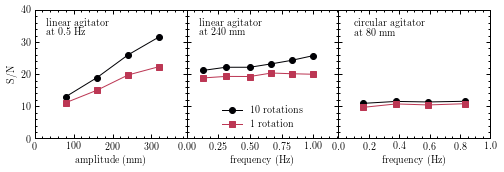

In [4]:
# Plot the amplitude and frequency data as 1x and 10x SNR

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=[7.10, 2.5])

for data, ax in zip(amp_freq_data[:-1], (ax1, ax2, ax3)):
    ax.plot(data['x_val'], data['mn_x10'], marker='o', label='10 rotations', color=cmap(0))
    ax.plot(data['x_val'], data['mn_x1'], marker='s', label='1 rotation', color=cmap(0.5))
    

# ax1.plot(amp_data['amp'], amp_data['mn_x10'], marker='o', label='10 rotations')
# ax1.plot(amp_data['amp'], amp_data['mn_x1'], marker='s', label='1 rotation')
ax1.set_xlabel('amplitude (mm)')
ax1.set_ylabel('S/N')
ax1.set_xlim(0,390)
ax1.set_ylim(0,40)
ax1.text(30, 32, 'linear agitator \n at 0.5 Hz')

# ax2.plot(lin_freq_data['freq'], lin_freq_data['mn_x10'], marker='o', label='10 rotations')
# ax2.plot(lin_freq_data['freq'], lin_freq_data['mn_x1'], marker='s', label='1 rotation')
ax2.set_xlabel('frequency (Hz)')
ax2.set_xlim(0,1.2)
ax2.legend(loc='lower center')
ax2.text(0.1, 32, 'linear agitator \n at 240 mm')


# ax3.plot(circ_freq_data['freq'], circ_freq_data['mn_x10'], marker='o', label='10 rotations')
# ax3.plot(circ_freq_data['freq'], circ_freq_data['mn_x1'], marker='s', label='1 rotation')
ax3.set_xlabel('frequency (Hz)')
ax3.set_xlim(0,1)
ax3.text(0.1, 32, 'circular agitator \n at 80 mm')

fig1.tight_layout()
fig1.subplots_adjust(wspace=0)
fig1.savefig('amp_freq_snr.pdf', dpi=600)


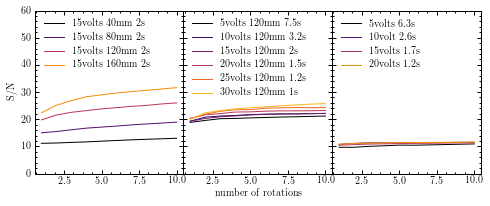

In [5]:
# Plot the amplitude and frequency data vs. integration time

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=[8,3])
all_data = [amp_data, lin_freq_data, circ_freq_data]

for data, ax in zip(all_data, [ax1, ax2, ax3]):
    for i, (mn_time, label) in enumerate(zip(data['mn_time'], data['labels'])):
        color = cmap(float(i) / len(data['labels']))
        ax.plot(range(1,11), mn_time, color=color, label=label)
    ax.legend(loc='upper left')

ax1.set_ylim(0,35)
ax2.set_xlabel('number of rotations')
ax1.set_ylabel('S/N')
ax1.set_ylim(0, 60)

fig2.subplots_adjust(wspace=0)

In [6]:
# Populate the agitation method data

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'

tests = ['unagitated', 'circular_agitation', 'linear_agitation', 'coupled_agitation']
labels = ['none', 'circular', 'linear', 'coupled']

circ_100_data = {'name': 'circular \\SI{100}{\micro\meter}',
                 'folder': folder + 'circular_100um/',
                 'tests': tests,
                 'labels': labels}

oct_100_data = {'name': 'octagonal \\SI{100}{\micro\meter}',
                'folder': folder + 'octagonal_100um/',
                'tests': tests,
                'labels': labels}

circ_200_data = {'name': 'circular \\SI{200}{\micro\meter}',
                 'folder': folder + 'circular_200um/',
                 'tests': tests + ['baseline'],
                 'labels': labels + ['LED source']}

oct_200_data = {'name': 'octagonal \\SI{200}{\micro\meter}',
                'folder': folder + 'octagonal_200um/',
                'tests': tests + ['baseline'],
                'labels': labels + ['LED source']}

rect_100x300_data = {'name': 'rectangular 100x\\SI{300}{\micro\meter}',
                     'folder': folder + 'rectangular_100x300um/',
                     'tests': tests + ['baseline'],
                     'labels': labels + ['LED source']}

ag_data = [circ_100_data, oct_100_data, circ_200_data, oct_200_data, rect_100x300_data]
populate_data(*ag_data)

print('Complete')


object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_100um\unagitated\nf_obj.pkl
height 2049
units pixels
_y 1047.71166027
_x 1201.16282965
full (1201.16282965, 1047.71166027)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F29E2E8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf

image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\unagitated\\nf_002.fit']
test Circular 100um unagitated 2/20/2017
image_file None
exp_time 10.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C6780>
date_time 2017-02-20 18:36:52.900000
num_images 1
full 293.120735127
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A504FE860>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_000.fit', 'C:\\

_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A5058B080>
date_time 2017-02-20 18:38:48.500000
num_images 1
full 293.232664837
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A5058B358>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\

kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_100um\unagitated\nf_000-006_obj.pkl
height 2049
units pixels
_y 1047.6126096
_x 1201.16516987
full (1201.16516987, 1047.6126096)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F3B3AC8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circula

_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50551630>
date_time 2017-02-20 19:16:44.900000
num_images 1
full 296.618047861
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50551AC8>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_004.fi

kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_100um\circular_agitation\nf_008_obj.pkl
height 2049
units pixels
_y 1048.16873791
_x 1200.9674512
full (1200.9674512, 1048.16873791)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A505ACC50>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\cir

_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A5054A898>
date_time 2017-02-20 19:16:28.400000
num_images 1
full 296.533624449
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A5054AEB8>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_004.fi

_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50545F28>
date_time 2017-02-20 19:05:38.800000
num_images 1
full 296.388410105
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50545400>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark

gini None
gradient None
fft None
gaussian None
filter 6.3729293866
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A4F30D208>
width 2447
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\linear_agitation\\nf_008.fit']
test Circular 100um linear agitation 30v 2/20/2017
image_file None
exp_time 10.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4F30D160>
date_time 2017-02-20 19:07:34.300000
num_images 1
full 296.660521406
gaussian None
edge None
radius None
units pixels
ci

tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A50503D30>
width 2447
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\linear_agitation\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\linear_agitation\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\linear_agitation\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\linear_agitation\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\linear_agitation\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\

units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4F1A3748>
date_time 2017-02-20 19:10:59.400000
num_images 1
full 296.359793454
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4F193898>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\dark\\nf_002.fit', 'C:\\Librarie

right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50526B38>
temp -4.6
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_100um\coupled_agitation\nf_006_obj.pkl
height 2049
units pixels
_y 1047.40522034
_x 1200.91951484
full (1200.91951484, 1047.40522034)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A505266D8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_100um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characteriz

pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_100um\coupled_agitation\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50582B00>
subframe_x 0
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50582400>
data_file None
subframe_y 0
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4F22AD30>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\d

_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A5053B320>
date_time 2017-03-31 20:25:29
num_images 1
full 286.679034213
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A5053B588>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_0

bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_100um\unagitated\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_100um\unagitated\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A504E09E8>
subframe_x 0
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A504E0668>
data_file None
subframe_y 0
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_prop

full 287.288253991
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50579860>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\

_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50550BA8>
date_time 2017-03-31 20:25:29
num_images 1
full 287.392438822
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A505500F0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\da

units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50503320>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\F

_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A5054A0B8>
date_time 2017-03-31 20:43:56.700000
num_images 1
full 286.360919122
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A5054A4E0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_da

threshold 1000
gini None
gradient None
fft None
gaussian None
filter 4.81854546827
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A505145C0>
width 2447
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\circular_agitation\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\circular_agitation\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\circular_agitation\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\circular_agitation\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100

_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50521C18>
date_time 2017-03-31 20:31:16.500000
num_images 1
full 287.033504852
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50521208>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\

_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50537978>
subframe_x 0
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50563630>
data_file None
subframe_y 0
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A505375C0>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_100um\linear_agitation\nf_000-001_obj.pkl
height 2049
units pixels
_y 1021.14274494
_x 1222.17576578
full (1222.17576578, 1021.14274494)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, No

_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F292208>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\ambient\\nf_004.fit', 'C

_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A505122B0>
date_time 2017-03-31 20:39:14
num_images 1
full 287.071630659
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4EA83198>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fibe

gini None
gradient None
fft None
gaussian None
filter 9.88953069983
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A504D9B38>
width 2447
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\coupled_agitation\\nf_006.fit']
test coupled agitation 100 um octagonal fiber
image_file None
exp_time 10.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A504D98D0>
date_time 2017-03-31 20:40:35.700000
num_images 1
full 286.227178056
gaussian None
edge None
radius None
units pixels
circ

_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4F268FD0>
date_time 2017-03-31 20:38:57.700000
num_images 1
full 286.071912199
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50582748>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_100um\\dark\\nf_0

full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4F0B8128>
data_file None
subframe_y 0
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A505A0D30>
temp -5.4
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_100um\coupled_agitation\nf_obj.pkl
height 2049
units pixels
_y 1021.93470831
_x 1221.66035586
full (1221.66035586, 1021.93470831)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
ci

_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A5053B710>
date_time 2017-06-07 14:27:00.800000
num_images 1
full 585.774776728
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A5053B518>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Charact

_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A505401D0>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_200um\unagitated\nf_000-001_obj.pkl
height 1000
units pixels
_y 500.672364607
_x 488.916224884
full (488.916224884, 500.672364607)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EA7BF60>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\K

energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A5054EDD8>
subframe_x 716
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A5054E8D0>
data_file None
subframe_y 522
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A5054E5C0>
temp -4.3
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_200um\unagitated\nf_000-007_obj.pkl
height 1000
units pixels
_y 500.614715428
_x 488.94090394
full (488.94090394, 500.614715428)
units pi

_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A5055D860>
date_time 2017-06-07 14:43:09.600000
num_images 1
full 588.656395903
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A5055DAC8>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_004.fi

_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A504E0128>
date_time 2017-06-07 14:43:31.500000
num_images 1
full 588.142754389
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A504E0518>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\

pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_200um\circular_agitation\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50533F28>
subframe_x 716
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50554710>
data_file None
subframe_y 522
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50533588>
temp -4.5
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analy

rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A505AC6A0>
data_file None
subframe_y 522
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A505AC128>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_200um\linear_agitation\nf_002_obj.pkl
height 1000
units pixels
_y 500.020494729
_x 488.688150504
full (488.688150504, 500.020494729)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F23

temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_200um\linear_agitation\nf_009_obj.pkl
height 1000
units pixels
_y 499.966933692
_x 488.737030605
full (488.737030605, 499.966933692)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50545668>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris

gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A504D97B8>
date_time 2017-06-07 14:33:51.200000
num_images 1
full 585.763895675
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A504D9470>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Ch

magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\coupled_agitation\\nf_001.fit']
test None
image_file None
exp_time 1.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50514E80>
date_time 2017-06-07 14:38:52.600000
num_images 1
full 588.153435678
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50514A58>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_000.fit', '

units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EFE3908>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_nois

_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4D8E4828>
date_time 2017-06-07 14:38:49.400000
num_images 1
full 585.511684936
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50510C18>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\dat

threshold 1000
gini None
gradient None
fft None
gaussian None
filter 38.8638316045
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A4F193390>
width 1000
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\baseline\\nf_002.fit']
test None
image_file None
exp_time 1.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4F193C18>
date_time 2017-06-07 13:51:23.600000
num_images 1
full 589.092598373
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter

_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F2E8278>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\circular_200um\\ambient\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterizati

pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\circular_200um\baseline\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A5054C6A0>
subframe_x 728
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A5054C438>
data_file None
subframe_y 519
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A5054CAC8>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\m

_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4F268358>
temp -4.7
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\unagitated\nf_003_obj.pkl
height 1000
units pixels
_y 503.591139785
_x 485.550537634
full (485.550537634, 503.591139785)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F19B5C0>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kri

_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4F0B85C0>
temp -4.7
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\unagitated\nf_000-001_obj.pkl
height 1000
units pixels
_y 503.604519652
_x 485.57577064
full (485.57577064, 503.604519652)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50572E48>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_

tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A5055A048>
width 1000
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\unagitated\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\unagitated\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\unagitated\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\unagitated\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\unagitated\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_d

units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4E9C6A90>
data_file None
subframe_y 525
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4E9C69B0>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\circular_agitation\nf_003_obj.pkl
height 1000
units pixels
_y 504.786761057
_x 487.624688178
full (487.624688178, 504.786761057)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInf

bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50590668>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\circular_agitation\nf_008_obj.pkl
height 1000
units pixels
_y 504.688652569
_x 487.548189536
full (487.548189536, 504.688652569)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50518470>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kri

rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A504D9DD8>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Im

bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\linear_agitation\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\linear_agitation\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50526AC8>
subframe_x 722
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A505268D0>
data_file None
subframe_y 525
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_e

circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50572DA0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characte

circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50523048>
date_time 2017-06-07 18:03:33.300000
num_images 1
full 626.839932389
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50523898>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\I

_center <fiber_properties.containers.FiberInfo object at 0x0000025A50514F98>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization

ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_

test None
image_file None
exp_time 1.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A504FA1D0>
date_time 2017-06-07 18:08:26.200000
num_images 1
full 627.160553696
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A504FAEF0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterizati

_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50527240>
temp -4.8
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\baseline\nf_005_obj.pkl
height 1000
units pixels
_y 503.784387174
_x 485.163344391
full (485.163344391, 503.784387174)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4E9E1FD0>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_000.fit', 'C:\

left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4F34DB38>
temp -4.8
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\octagonal_200um\baseline\nf_000-002_obj.pkl
height 1000
units pixels
_y 503.75676836
_x 485.100675303
full (485.100675303, 503.75676836)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F21EBA8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\ambient\\nf_001.fit', 'C:\\Libra

test None
image_file None
exp_time 1.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50520B00>
date_time 2017-06-07 17:42:55.300000
num_images 1
full 628.420823389
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50520160>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\octagonal_200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterizati

bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A504FE5C0>
temp -4.4
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\unagitated\nf_004_obj.pkl
height 1200
units pixels
_y 612.472275817
_x 608.214792369
full (608.214792369, 612.472275817)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F361D30>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\

units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4EF28240>
temp -4.7
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\unagitated\nf_000-002_obj.pkl
height 1200
units pixels
_y 612.579820298
_x 608.336288229
full (608.336288229, 612.579820298)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F1DD080>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_000.fit', 'C:\\Librar

old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\unagitated\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A5059A3C8>
subframe_x 647
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A5059ACC0>
data_file None
subframe_y 429
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4F398320>
temp -4.7
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_no

gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50527BA8>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\recta

new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\circular_agitation\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\circular_agitation\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A5051D2B0>
subframe_x 647
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A5051DD68>
data_file None
subframe_y 429
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)

units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A504FE710>
temp -4.5
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\circular_agitation\nf_obj.pkl
height 1200
units pixels
_y 612.595316775
_x 607.487748126
full (607.487748126, 612.595316775)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A5051F588>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rect

circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A5053CB70>
data_file None
subframe_y 429
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A5053C6A0>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\linear_agitation\nf_006_obj.pkl
height 1200
units pixels
_y 612.338346381
_x 607.523109716
full (607.523109716, 612.338346381)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object 

_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A5052D668>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\am

units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A4F2997B8>
data_file None
subframe_y 429
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50540128>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\coupled_agitation\nf_obj.pkl
height 1200
units pixels
_y 612.657546257
_x 607.37899611
full (607.37899611, 612.657546257)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo

_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50510668>
temp -5.2
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\coupled_agitation\nf_005_obj.pkl
height 1200
units pixels
_y 612.680478236
_x 607.338476221
full (607.338476221, 612.680478236)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50520D30>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analy

_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A505367F0>
temp -5.2
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\coupled_agitation\nf_000-003_obj.pkl
height 1200
units pixels
_y 612.613685185
_x 607.399404893
full (607.399404893, 612.613685185)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A505360B8>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\

input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50581860>
subframe_x 647
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50510E10>
data_file None
subframe_y 429
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50581748>
temp -5.2
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\Kris_data\rectangular_100x300um\baseline\nf_obj.pkl
height 1200
units pixels
_y 593.691575413
_x 599.987066829
full (599.987066829, 593.691575413)
units pixels
_y None
_x None
gaussian (N

units pixels
_y 593.677862973
_x 600.020211872
full (600.020211872, 593.677862973)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4F1C3DA0>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300

units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A5056B710>
date_time 2017-06-08 20:30:45.400000
num_images 1
full 897.655276392
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A5056E400>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_00

rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A4F2998D0>
date_time 2017-06-08 20:30:45.400000
num_images 1
full 896.928173828
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A4F193BE0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\Kris_data\\rectangular_100x300um\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\moda

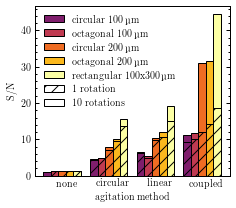

In [7]:
# Plot the agitation data

colors = [cmap(i) for i in np.linspace(0.35,1,5)]

num_tests = len(ag_data)
bar_width = 0.8 / num_tests
indexes = np.arange(4)

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])

handles = []
for i, (data, color) in enumerate(zip(ag_data, colors)):
    handles.append(ax.bar(indexes+0.1+i*bar_width, data['mn_x10'][:4],
                   bar_width, label=data['name'],
                   edgecolor='black', zorder=3, color=color))
    ax.bar(indexes+0.1+i*bar_width, data['mn_x1'][:4],
            bar_width, edgecolor='black', zorder=5,
            hatch='//', color=color)

ax.set_xticks(indexes+0.5)
ax.set_xticklabels(data['labels'][:4], rotation=0, ha='center')
ax.tick_params(axis='x', which='both', bottom='off', top='off')
ax.set_xlabel('agitation method')
ax.set_ylabel('S/N')
# ax.grid(which='major', axis='y', zorder=0)

handles.append(mpl.patches.Patch(color='white', ec='black', hatch='//', label='1 rotation'))
handles.append(mpl.patches.Patch(color='white', ec='black', label='10 rotations'))

color_legend = ax.legend(handles=handles, loc='upper left', framealpha=1)

fig.tight_layout()
fig.savefig('ag_snr.pdf', dpi=600)


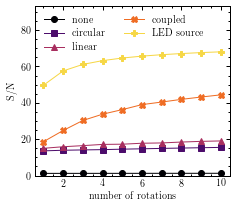

In [8]:
# Plot the SNR vs time data

markers = ['o', 's', '^', 'X', 'P']
colors = [cmap(i) for i in np.linspace(0,0.9,5)]

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])
# colors = np.linspace(0, 1, len(rect_100x300_data['labels']))

for (mn_time, label, color, marker) in zip(rect_100x300_data['mn_time'], rect_100x300_data['labels'], colors, markers):
    ax.plot(range(1,11), mn_time, marker=marker, color=color, label=label)
    
ax.set_ylim(0,93)
ax.set_xlabel('number of rotations')
ax.set_ylabel('S/N')
ax.legend(loc='upper left', ncol=2)

fig.tight_layout()

fig.savefig('rect_snr_vs_time.pdf')

In [9]:
# Populate the coupled fiber data

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/coupled_fibers/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/coupled_fibers/'

labels = ['neither', 'first', 'second', 'both']
tests = ['unagitated', 'agitated_first', 'agitated_second', 'agitated_both']

same_data = {'name': r'200-\SI{200}{\micro\meter}',
             'folder': folder + '200-200um_test2/',
             'tests': tests,
             'labels': labels}

shape_data = {'name': r'\SI{200}{\micro\meter} oct-circ',
              'folder': folder + 'oct-circ-200um/',
              'tests': ['unagitated', 'agitated_oct', 'agitated_circ', 'agitated_both'],
              'labels': labels}

size_data = {'name': r'100-\SI{200}{\micro\meter}',
                 'folder': folder + '100-200um/',
                 'tests': ['unagitated', 'agitated_first_100um', 'agitated_second_200um', 'agitated_both'],
                 'labels': labels}

single_data = {'name': r'\SI{200}{\micro\meter}',
               'folder': 'C:/Libraries/Google Drive/Yale/Research/fiber_data/modal_noise/amp_freq_200um/',
               'tests': ['agitated_30volts_40mm_1s']}

cf_data = [size_data, same_data, shape_data]
populate_data_1x(single_data, *cf_data)

print('Complete')


object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\amp_freq_200um\agitated_30volts_40mm_1s\nf_obj.pkl
height 1000
full None
gaussian None
edge None
radius None
circle None
rectangle None
_array_sum <fiber_properties.containers.FiberInfo object at 0x0000025A4F1D79B0>
units pixels
magnification None
pixel_size None
_y None
_x None
full (None, None)
units pixels
magnification 10.0
pixel_size 3.45
_y None
_x None
gaussian (None, None)
units pixels
magnification 10.0
pixel_size 3.45
_y None
_x None
edge (None, None)
units pixels
magnification 10.0
pixel_size 3.45
_y None
_x None
radius (None, None)
units pixels
magnification 10.0
pixel_size 3.45
_y None
_x None
circle (None, None)
units pixels
magnification 10.0
pixel_size 3.45
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50B2CC18>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\amp_

_x 489.0
edge (489.0, 499.5)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A4EFE3BA8>
ambient None
threshold 1000
gini None
gradient None
freq [  0.00000000e+00   1.15942029e-03   2.31884058e-03 ...,   1.44695652e+00
   1.44811594e+00   1.44927536e+00]
power [  1.25257229e-01   1.22115514e-01   1.13819490e-01 ...,   8.90920133e-06
   8.90512619e-06   1.06789742e-05]
fft <fiber_properties.containers.FFTInfo object at 0x0000025A50B2CC18>
gaussian None
filter 9.75229132899
entropy None
tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A50B2CF28>
width 1000
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\amp_freq_200um\\agitated_30volts_40mm_1s\\nf_002.fit']
test None


_y 331.101660687
_x 324.362306385
full (324.362306385, 331.101660687)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50B72860>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_003.fit', 'C:\\Libraries\

_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50BD9048>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_005.fit', 'C:\\Libraries\\Box Sync\\ExoLa

bit_depth 16
new_calibration False
folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\100-200um\agitated_first_100um\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\100-200um\agitated_first_100um\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50BCE5C0>
subframe_x 894
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50BA1B00>
data_file None
subframe_y 689
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, No

folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\100-200um\agitated_first_100um\
pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\100-200um\agitated_first_100um\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50C033C8>
subframe_x 894
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50C03DD8>
data_file None
subframe_y 689
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.contai

input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50BEC940>
subframe_x 894
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50BD4CF8>
data_file None
subframe_y 689
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50BEC3C8>
temp -4.6
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\100-200um\agitated_second_200um\nf_004_obj.pkl
height 650
units pixels
_y 331.317925514
_x 323.731865038
full (323.731865038, 331.317925514)
units pixels
_y None
_x None
ga

_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A504E8278>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_004.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterizati

top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A5068DB00>
temp -4.7
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\100-200um\agitated_both\nf_008_obj.pkl
height 650
units pixels
_y 330.886941357
_x 323.389202453
full (323.389202453, 330.886941357)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50B5DF28>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\100-200um\\ambient\\nf_000.fit', 'C:\\Libra

circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A509CE160>
date_time 2017-03-29 14:09:37.800000
num_images 1
full 578.395348138
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A509CE780>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\dark\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber

_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50B7A2E8>
date_time 2017-03-29 14:42:51.700000
num_images 1
full 580.136589624
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50BF2DA0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\dark\\nf_002.fit', 'C:\\Lib

_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A50BC5DA0>
width 650
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\agitated_first\\nf_007.fit']
test None
image_file None
exp_time 1.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50BC5320>
date_time 2017-03-29 14:43:09.600000
num_images 1
full 580.522581986
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50BC5780>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\F

output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50BCE630>
subframe_x 912
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50BCEA90>
data_file None
subframe_y 686
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50BCE160>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\200-200um_test2\agitated_second\nf_004_obj.pkl
height 650
units pixels
_y 335.468645632
_x 330.25256203
full (330.25256203, 335.468645632)
units pixels
_y N

_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50B76080>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\ambient\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200um_test2\\ambient\\nf_003.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\mo

units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50B4D668>
temp -4.2
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\200-200um_test2\agitated_both\nf_007_obj.pkl
height 650
units pixels
_y 335.922360484
_x 330.558102701
full (330.558102701, 335.922360484)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50BC5F28>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\200-200u

pixel_size 3.45
old_folder C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\oct-circ-200um\unagitated\
gaussian_coeffs None
energy_loss []
output_fnum 2.4
input_fnum 2.4
encircled_energy []
encircled_energy_fnum []
_frd_info <fiber_properties.containers.FRDInfo object at 0x0000025A50BD9D68>
subframe_x 722
full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50B5C0F0>
data_file None
subframe_y 526
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A50BD9BA8>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis

gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A509CEBA8>
date_time 2017-06-05 18:38:57.700000
num_images 1
full 580.94869557
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A506291D0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\Ex

edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50B89B38>
date_time 2017-06-05 19:17:58.700000
num_images 1
full 585.403628217
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50B89CC0>
dark ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\dark\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\dark\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\dark\\nf_002.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data

full {b'dark_folder': b'../dark/', b'ambient_folder': b'../ambient/', b'show_image': False}
gaussian {}
edge {}
radius {}
units pixels
circle {}
rectangle {}
_options <fiber_properties.containers.FiberInfo object at 0x0000025A50B4FD30>
data_file None
subframe_y 526
units pixels
units pixels
_y None
_x None
top (None, None)
units pixels
_y None
_x None
right (None, None)
units pixels
_y None
_x None
bottom (None, None)
units pixels
_y None
_x None
left (None, None)
_edges <fiber_properties.containers.Edges object at 0x0000025A4E5760B8>
temp -5.0
kernel_size 9
object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\oct-circ-200um\agitated_circ\nf_000_obj.pkl
height 1000
units pixels
_y 487.910117943
_x 506.497938917
full (506.497938917, 487.910117943)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x N

object_file C:\Libraries\Box Sync\ExoLab\Fiber_Characterization\Image Analysis\data\modal_noise\coupled_fibers\oct-circ-200um\agitated_circ\nf_008_obj.pkl
height 1000
units pixels
_y 487.998995001
_x 506.506952182
full (506.506952182, 487.998995001)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_center <fiber_properties.containers.FiberInfo object at 0x0000025A50B41710>
ambient ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\ambient\\nf_000.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\ambient\\nf_001.fit', 'C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\

tophat None
contrast None
_modal_noise_info <fiber_properties.containers.ModalNoiseInfo object at 0x0000025A50BDDE10>
width 1000
magnification 10.0
camera nf
image_input ['C:\\Libraries\\Box Sync\\ExoLab\\Fiber_Characterization\\Image Analysis\\data\\modal_noise\\coupled_fibers\\oct-circ-200um\\agitated_both\\nf_004.fit']
test None
image_file None
exp_time 1.0
flat None
units pixels
_y None
_x None
full (None, None)
units pixels
_y None
_x None
gaussian (None, None)
units pixels
_y None
_x None
edge (None, None)
units pixels
_y None
_x None
radius (None, None)
units pixels
units pixels
_y None
_x None
circle (None, None)
units pixels
_y None
_x None
rectangle (None, None)
_centroid <fiber_properties.containers.FiberInfo object at 0x0000025A50BDD748>
date_time 2017-06-05 19:08:53.400000
num_images 1
full 584.672846573
gaussian None
edge None
radius None
units pixels
circle None
rectangle None
_diameter <fiber_properties.containers.FiberInfo object at 0x0000025A50BDDF60>
dark ['C:\\Libra

NameError: name 'xrange' is not defined

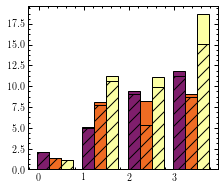

In [10]:
# Plot the coupled fiber data

colors = [cmap(i) for i in np.linspace(0.35,1,3)]

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])

num_tests = len(cf_data)
bar_width = 0.8 / num_tests
indexes = np.arange(4)

handles = []
for i, (data, color) in enumerate(zip(cf_data, colors)):
    ax.bar(indexes+0.1+i*bar_width, data['mn_x10'],
           bar_width, label=data['name'],
           edgecolor='black', zorder=3, color=color)
    ax.bar(indexes+0.1+i*bar_width, data['mn_x1'],
            bar_width, edgecolor='black', zorder=5,
            hatch='//', color=color)

ax.plot(np.linspace(-1, 4, 4), [single_data['mn_x1'][0] for i in range(4)], '--', color='black', label='\\SI{200}{\micro\meter} 1 rotation')
ax.plot(np.linspace(-1, 4, 4), [single_data['mn_x10'][0] for i in range(4)], '-', color='black', label='\\SI{200}{\micro\meter} 10 rotations')

handles, labels = ax.get_legend_handles_labels()
handles = handles[2:] + handles[:2]
labels = labels[2:] + labels[:2]
first_legend = ax.legend(handles=handles, labels=labels, loc='upper left')
plt.gca().add_artist(first_legend)

handles = []
handles.append(mpl.patches.Patch(color='white', ec='black', hatch='//', label='1 rotation'))
handles.append(mpl.patches.Patch(color='white', ec='black', label='10 rotations'))
line_legend = ax.legend(handles=handles, loc='upper right')

ax.set_xticks(indexes+0.5)
ax.set_xticklabels(data['labels'], rotation=0, ha='center')
ax.tick_params(axis='x', which='both', bottom='off', top='off')
ax.set_xlabel('agitated fiber')
ax.set_ylabel('S/N')
ax.set_ylim(0,25)
ax.set_xlim(-bar_width,4)
# ax.grid(which='major', axis='y', zorder=0)

fig.tight_layout()

fig.savefig('coupled_fibers.pdf')

In [ ]:
# Populate the tweeter data

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/tweeter_exp/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/tweeter_exp/'

labels = ['none', 'tweeter', 'coupled', 'tweeter+coupled']
tests = ['unagitated', 'tweeter_solo', 'coupled_ag', 'coupled_tweeting']

tweeter_data = {'name': '',
             'folder': folder,
             'tests': tests,
             'labels': labels}

populate_data(tweeter_data)

print('Complete')


In [ ]:
# Plot the tweeter data

color = cmap(0.9)

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])

bar_width = 0.8
indexes = np.arange(len(tweeter_data['mn_x10']))

ax.bar(indexes+0.1, tweeter_data['mn_x10'],
       bar_width, label=data['name'],
       edgecolor='black', zorder=3, color=color)
ax.bar(indexes+0.1, tweeter_data['mn_x1'],
        bar_width, edgecolor='black', zorder=5,
        hatch='//', color=color)

handles = []
handles.append(mpl.patches.Patch(color=color, ec='black', label='rectangular 100x\\SI{300}{\micro\meter}'))
handles.append(mpl.patches.Patch(color='white', ec='black', hatch='//', label='1 exposure'))
handles.append(mpl.patches.Patch(color='white', ec='black', label='10 exposures'))
line_legend = ax.legend(handles=handles, loc='upper left')

ax.set_xticks(indexes+0.1)
ax.set_xticklabels(tweeter_data['labels'], rotation=0, ha='center')
ax.tick_params(axis='x', which='both', bottom='off', top='off')
ax.set_xlabel('agitation method')
ax.set_ylabel('S/N')
ax.set_ylim(0, 53)
ax.set_xlim(-bar_width, len(tweeter_data['mn_x10']))

fig.tight_layout()

fig.savefig('tweeter_snr_bar.pdf', dpi=600)


In [ ]:
# Plot the SNR vs time data

markers = ['o', 's', '^', 'X', 'P']
colors = [cmap(i) for i in np.linspace(0,0.9,5)]

fig, ax = plt.subplots(1, 1, figsize=[3.39, 3.0])
# colors = np.linspace(0, 1, len(rect_100x300_data['labels']))

for (mn_time, label, color, marker) in zip(tweeter_data['mn_time'], tweeter_data['labels'], colors, markers):
    ax.plot(range(1,11), mn_time, marker=marker, color=color, label=label)

ax.plot(range(1,11), rect_100x300_data['mn_time'][-1], marker=markers[-1], color=colors[-1], label=rect_100x300_data['labels'][-1])
    
ax.set_ylim(0,93)
ax.set_xlabel('number of rotations')
ax.set_ylabel('S/N')
ax.legend(loc='upper left', ncol=2)

fig.tight_layout()

fig.savefig('tweeter_snr.pdf', dpi=600)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[7.1, 2.3666666])

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'

im1 = FiberImage(folder + 'circular_200um/unagitated/nf_000.fit').get_image()
im2 = FiberImage(folder + 'octagonal_200um/unagitated/nf_000.fit').get_image()
im3 = FiberImage(folder + 'rectangular_100x300um/unagitated/nf_000.fit').get_image()[100:1100, 100:1100]

for (ax, im) in zip((ax1, ax2, ax3), (im1, im2, im3)):
    ax.imshow((im-np.min(im)+1)**(.6), cmap='inferno')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    ax.axis('off')

ax1.set_position([0, 0, .33, 1])
ax2.set_position([.33, 0, .33, 1])
ax3.set_position([.66, 0, .33, 1])
    
fig1.tight_layout()
fig1.subplots_adjust(wspace=0)

fig.savefig('fiber_example.pdf', dpi=600)


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[7.1, 2.3666666])

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/Kris_data/'

im1 = FiberImage(folder + 'circular_200um/coupled_agitation/nf_corrected.fit').get_image()
im2 = FiberImage(folder + 'octagonal_200um/coupled_agitation/nf_corrected.fit').get_image()
im3 = FiberImage(folder + 'rectangular_100x300um/coupled_agitation/nf_corrected.fit').get_image()[100:1100, 100:1100]

for (ax, im) in zip((ax1, ax2, ax3), (im1, im2, im3)):
    ax.imshow((im-np.min(im)+1), cmap='inferno')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    ax.axis('off')

ax1.set_position([0, 0, .33, 1])
ax2.set_position([.33, 0, .33, 1])
ax3.set_position([.66, 0, .33, 1])
    
fig1.tight_layout()
fig1.subplots_adjust(wspace=0)

fig.savefig('fiber_improved.pdf', dpi=600)


In [ ]:
from fiber_properties import image_list

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[7.1, 2.3666666])

folder = 'C:/Libraries/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/rv_error/'
# folder = '/Users/rrp28/Box Sync/Exolab/Fiber_Characterization/Image Analysis/data/modal_noise/rv_error/'

im1 = FiberImage(image_list(folder + 'slow_agitation/nf_', num=10, start=0)).get_image()[100:1100, 100:1100]
im2 = FiberImage(image_list(folder + 'coupled_ag_new/nf_', num=10, start=0)).get_image()[100:1100, 100:1100]
im3 = FiberImage(image_list(folder + 'LED/nf_', num=10, start=0)).get_image()[100:1100, 100:1100]

for (ax, im) in zip((ax1, ax2, ax3), (im1, im2, im3)):
    ax.imshow((im-np.min(im)+1), cmap='inferno')
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1000)
    ax.axis('off')

ax1.set_position([0, 0, .33, 1])
ax2.set_position([.33, 0, .33, 1])
ax3.set_position([.66, 0, .33, 1])
    
fig1.tight_layout()
fig1.subplots_adjust(wspace=0)

fig.savefig('fiber_rv_error.pdf', dpi=600)